In [107]:
import pandas as pd
import numpy as np

In [108]:
#Leggo il dataset
df = pd.read_csv("dataset.csv")
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [109]:
# Dimensioni
print("Shape:", df.shape)

# Tipi di dato e null
df.info()

Shape: (114000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  

In [110]:
# Colonne sospette (indici)
suspect_cols = [c for c in df.columns if "unnamed" in c.lower()]
suspect_cols


['Unnamed: 0']

In [111]:
# Conteggio valori nulli per colonna
null_count = df.isnull().sum()

# Percentuale valori nulli
null_percent = (null_count / len(df)) * 100

null_analysis = pd.DataFrame({
    "null_count": null_count,
    "null_percent": null_percent
}).sort_values(by="null_count", ascending=False)

null_analysis[null_analysis["null_count"] > 0]


,null_count,null_percent
artists,1,0.000877
track_name,1,0.000877
album_name,1,0.000877


In [112]:
df.duplicated().sum()


np.int64(0)

In [113]:
#Controllo il numero di duplicati per track_id
df.duplicated(subset=["track_id"]).sum()


np.int64(24259)

In [114]:
#Controllo il numero di duplicati per titolo e artista
df.duplicated(subset=["track_name", "artists"]).sum()


np.int64(32656)

In [115]:
dup_groups = (
    df[df.duplicated(subset=["track_name", "artists"], keep=False)]
    .groupby(["track_name", "artists"])
    .size()
    .sort_values(ascending=False)
)

dup_groups.head(10)


track_name                      artists               
Run Rudolph Run                 Chuck Berry               151
Little Saint Nick - 1991 Remix  The Beach Boys             76
Last Last                       Burna Boy                  75
Frosty The Snowman              Ella Fitzgerald            69
Christmas Time                  Bryan Adams                66
CÓMO SE SIENTE - Remix          Jhayco;Bad Bunny           64
RUMBATÓN                        Daddy Yankee               60
Sleigh Ride                     Ella Fitzgerald            60
X ÚLTIMA VEZ                    Daddy Yankee;Bad Bunny     58
Feliz Cumpleaños Ferxxo         Feid                       54
dtype: int64

In [116]:



# Funzione per calcolare la moda
def mode(series):
    return series.mode().iloc[0]

agg_dict = {
    # ---------- FEATURE NUMERICHE → MEDIA ----------
    "popularity": "mean",
    "duration_ms": "mean",
    "danceability": "mean",
    "energy": "mean",
    "loudness": "mean",
    "speechiness": "mean",
    "acousticness": "mean",
    "instrumentalness": "mean",
    "liveness": "mean",
    "valence": "mean",
    "tempo": "mean",

    # ---------- FEATURE CATEGORICHE → MODA ----------
    "album_name": mode,
    "track_genre": mode,
    "explicit": mode,
    "key": mode,
    "mode": mode,
    "time_signature": mode,

    # ---------- METADATO ----------
    "track_id": "first"
}


# Deduplicazione semantica avanzata

df_dedup = (
    df
    .groupby(["track_name", "artists"], as_index=False)
    .agg(agg_dict)
)



# CONTROLLI FINALI

# 1. Nessun duplicato semantico residuo
assert df_dedup.duplicated(
    subset=["track_name", "artists"]
).sum() == 0, "Errore: duplicati semantici presenti!"

# 2. Reset indice
df_dedup = df_dedup.reset_index(drop=True)

# 3. Info finale
print("Dataset finale pronto per il recommender")
print("Shape:", df_dedup.shape)
df_dedup.info()



Dataset finale pronto per il recommender
Shape: (81343, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81343 entries, 0 to 81342
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        81343 non-null  object 
 1   artists           81343 non-null  object 
 2   popularity        81343 non-null  float64
 3   duration_ms       81343 non-null  float64
 4   danceability      81343 non-null  float64
 5   energy            81343 non-null  float64
 6   loudness          81343 non-null  float64
 7   speechiness       81343 non-null  float64
 8   acousticness      81343 non-null  float64
 9   instrumentalness  81343 non-null  float64
 10  liveness          81343 non-null  float64
 11  valence           81343 non-null  float64
 12  tempo             81343 non-null  float64
 13  album_name        81343 non-null  object 
 14  track_genre       81343 non-null  object 
 15  explicit          81343 non

In [117]:
dup_groups = (
    df_dedup[df_dedup.duplicated(subset=["track_name", "artists"], keep=False)]
    .groupby(["track_name", "artists"])
    .size()
    .sort_values(ascending=False)
)

dup_groups.head(10)

Series([], dtype: int64)

Il dataset contiene più versioni della stessa canzone (album diversi, ristampe, compilation), identificate dalla coppia (track_name, artists). Per ottenere una rappresentazione unica e robusta di ciascun brano, le versioni duplicate vengono aggregate mantenendo una sola riga:
 - le feature numeriche sono aggregate tramite media
 - le feature categoriche tramite moda
  Questo approccio riduce il rumore e fornisce una rappresentazione più stabile del contenuto musicale per il sistema di raccomandazione.



In [118]:
#Controllo il numero di duplicati per track_id
df_dedup.duplicated(subset=["track_id"]).sum()

np.int64(0)

Dopo la deduplicazione semantica basata su (track_name, artists), il campo track_id non rappresenta più una chiave univoca del dataset. Eventuali duplicati su track_id non influiscono sul sistema di raccomandazione, in quanto ogni canzone è rappresentata da una sola riga dal punto di vista semantico.


In [119]:
# Dimensioni
print("Shape:", df_dedup.shape)

# Tipi di dato e null
df_dedup.info()

Shape: (81343, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81343 entries, 0 to 81342
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        81343 non-null  object 
 1   artists           81343 non-null  object 
 2   popularity        81343 non-null  float64
 3   duration_ms       81343 non-null  float64
 4   danceability      81343 non-null  float64
 5   energy            81343 non-null  float64
 6   loudness          81343 non-null  float64
 7   speechiness       81343 non-null  float64
 8   acousticness      81343 non-null  float64
 9   instrumentalness  81343 non-null  float64
 10  liveness          81343 non-null  float64
 11  valence           81343 non-null  float64
 12  tempo             81343 non-null  float64
 13  album_name        81343 non-null  object 
 14  track_genre       81343 non-null  object 
 15  explicit          81343 non-null  bool   
 16  key               813

In [120]:
#Elimino la colonna Unnamed in quanto non contiene informazione utile
#df = df_dedup.drop(columns=["Unnamed: 0"])

#Elimino le righe con valori mancanti in artist, album_name e track_name
df = df_dedup.dropna(subset=["artists", "album_name", "track_name"])

#Vado a sistemare l'indice che a causa del drop non sarà più ordinato
df = df_dedup.reset_index(drop=True)

# Dimensioni
print("Shape:", df_dedup.shape)

# Tipi di dato e null
df_dedup.info()

Shape: (81343, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81343 entries, 0 to 81342
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        81343 non-null  object 
 1   artists           81343 non-null  object 
 2   popularity        81343 non-null  float64
 3   duration_ms       81343 non-null  float64
 4   danceability      81343 non-null  float64
 5   energy            81343 non-null  float64
 6   loudness          81343 non-null  float64
 7   speechiness       81343 non-null  float64
 8   acousticness      81343 non-null  float64
 9   instrumentalness  81343 non-null  float64
 10  liveness          81343 non-null  float64
 11  valence           81343 non-null  float64
 12  tempo             81343 non-null  float64
 13  album_name        81343 non-null  object 
 14  track_genre       81343 non-null  object 
 15  explicit          81343 non-null  bool   
 16  key               813

In [121]:
#Individuo quanti generi musicali ci sono
n_genres = df["track_genre"].nunique()
print("Numero di generi musicali:", n_genres)

#Individuo quali sono i generi presenti
genres = sorted(df["track_genre"].unique())
genres

#Individuo quante canzoni sono presenti per ogni genere
genre_counts = df["track_genre"].value_counts()
genre_counts

genre_df = genre_counts.reset_index()
genre_df.columns = ["track_genre", "num_tracks"]
genre_df

genre_df["percentage"] = (
    genre_df["num_tracks"] / len(df) * 100
).round(2)

print(genre_df.to_string(index=False))




Numero di generi musicali: 113
      track_genre  num_tracks  percentage
            study         996        1.22
      black-metal         991        1.22
           comedy         987        1.21
      heavy-metal         985        1.21
        bluegrass         978        1.20
            forro         968        1.19
        grindcore         967        1.19
            malay         965        1.19
              idm         959        1.18
          iranian         958        1.18
        breakbeat         956        1.18
    chicago-house         956        1.18
          new-age         955        1.17
         cantopop         955        1.17
           disney         953        1.17
         afrobeat         953        1.17
            happy         950        1.17
            sleep         945        1.16
             club         945        1.16
            anime         941        1.16
         acoustic         941        1.16
             kids         940        1.16
   

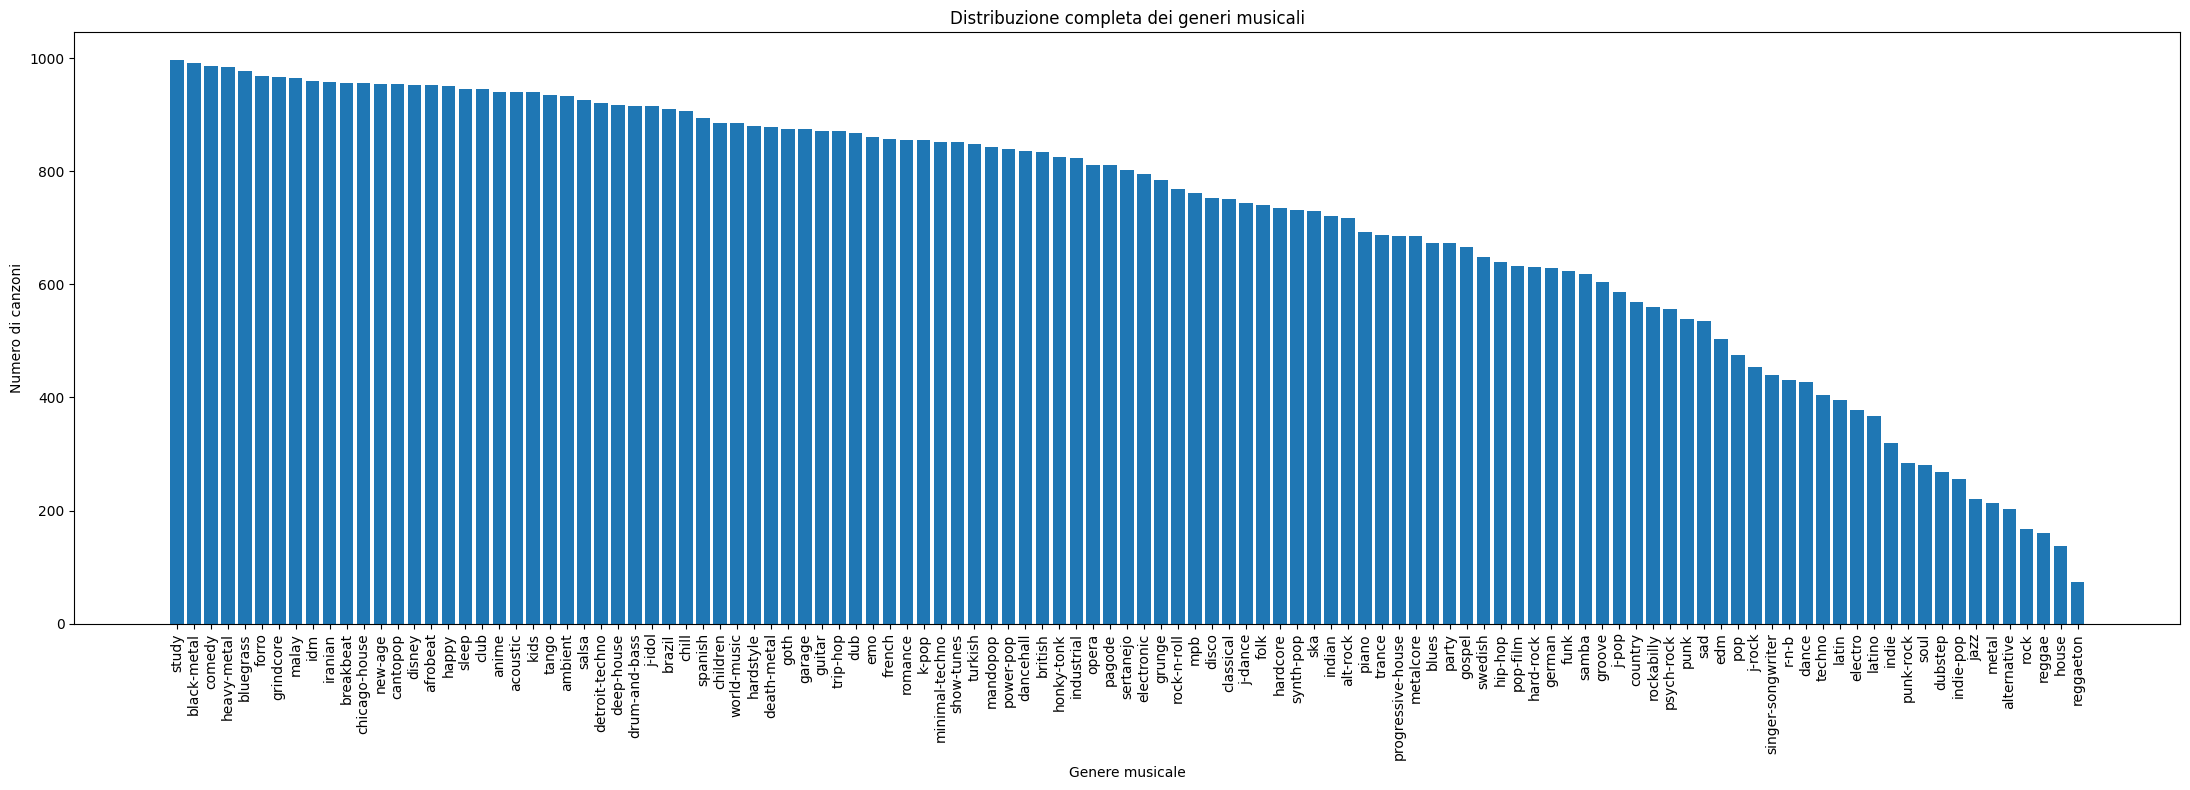

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8))

plt.bar(
    genre_df["track_genre"],
    genre_df["num_tracks"]
)

plt.xlabel("Genere musicale")
plt.ylabel("Numero di canzoni")
plt.title("Distribuzione completa dei generi musicali")

# Ruoto le etichette sull'asse X per renderle leggibili
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [123]:
#Creo una nuova colonna andando a raggruppare i generi nella loro macro categoria
def map_to_main_genre(genre: str) -> str:
    g = genre.lower()

    if "rock" in g:
        return "rock"
    if "pop" in g:
        return "pop"
    if any(x in g for x in ["techno", "house", "edm", "trance", "dub", "electronic", "club"]):
        return "electronic"
    if any(x in g for x in ["hip-hop", "rap", "trap"]):
        return "hip-hop"
    if any(x in g for x in ["latin", "reggaeton", "salsa", "samba", "mpb", "pagode"]):
        return "latin"
    if "metal" in g:
        return "metal"
    if any(x in g for x in ["jazz", "blues", "soul"]):
        return "jazz_blues"
    if any(x in g for x in ["classical", "opera", "piano"]):
        return "classical"
    if any(x in g for x in ["folk", "country", "bluegrass"]):
        return "folk_country"
    if any(x in g for x in ["afro", "world", "indian", "iranian", "turkish"]):
        return "world"
    if any(x in g for x in ["study", "sleep", "happy", "sad", "party", "kids", "children"]):
        return "mood_context"

    # Se non rientra in nessuna macro-categoria,
    # manteniamo il genere originale
    return genre


df["main_genre"] = df["track_genre"].apply(map_to_main_genre)
df["main_genre"].value_counts()
(
    df["main_genre"].value_counts(normalize=True) * 100
).round(2)



main_genre
electronic           10.99
pop                   7.59
mood_context          7.29
world                 5.37
rock                  5.09
latin                 4.86
metal                 4.62
folk_country          2.81
classical             2.77
jazz_blues            1.44
comedy                1.21
forro                 1.19
grindcore             1.19
malay                 1.19
idm                   1.18
breakbeat             1.18
new-age               1.17
disney                1.17
acoustic              1.16
anime                 1.16
tango                 1.15
ambient               1.15
drum-and-bass         1.12
j-idol                1.12
brazil                1.12
chill                 1.12
spanish               1.10
hardstyle             1.08
goth                  1.08
garage                1.07
guitar                1.07
trip-hop              1.07
emo                   1.06
french                1.05
romance               1.05
show-tunes            1.05
dancehall        

In [124]:
#Individuo quanti generi musicali ci sono
n_genres = df["main_genre"].nunique()
print("Numero di generi musicali:", n_genres)

#Individuo quali sono i generi presenti
genres = sorted(df["main_genre"].unique())
genres

#Individuo quante canzoni sono presenti per ogni genere
genre_counts = df["main_genre"].value_counts()
genre_counts

genre_df = genre_counts.reset_index()
genre_df.columns = ["main_genre", "num_tracks"]
genre_df

genre_df["percentage"] = (
    genre_df["num_tracks"] / len(df) * 100
).round(2)

print(genre_df.to_string(index=False))



Numero di generi musicali: 60
       main_genre  num_tracks  percentage
       electronic        8941       10.99
              pop        6174        7.59
     mood_context        5927        7.29
            world        4366        5.37
             rock        4137        5.09
            latin        3955        4.86
            metal        3754        4.62
     folk_country        2286        2.81
        classical        2255        2.77
       jazz_blues        1175        1.44
           comedy         987        1.21
            forro         968        1.19
        grindcore         967        1.19
            malay         965        1.19
              idm         959        1.18
        breakbeat         956        1.18
          new-age         955        1.17
           disney         953        1.17
         acoustic         941        1.16
            anime         941        1.16
            tango         935        1.15
          ambient         933        1.15
    

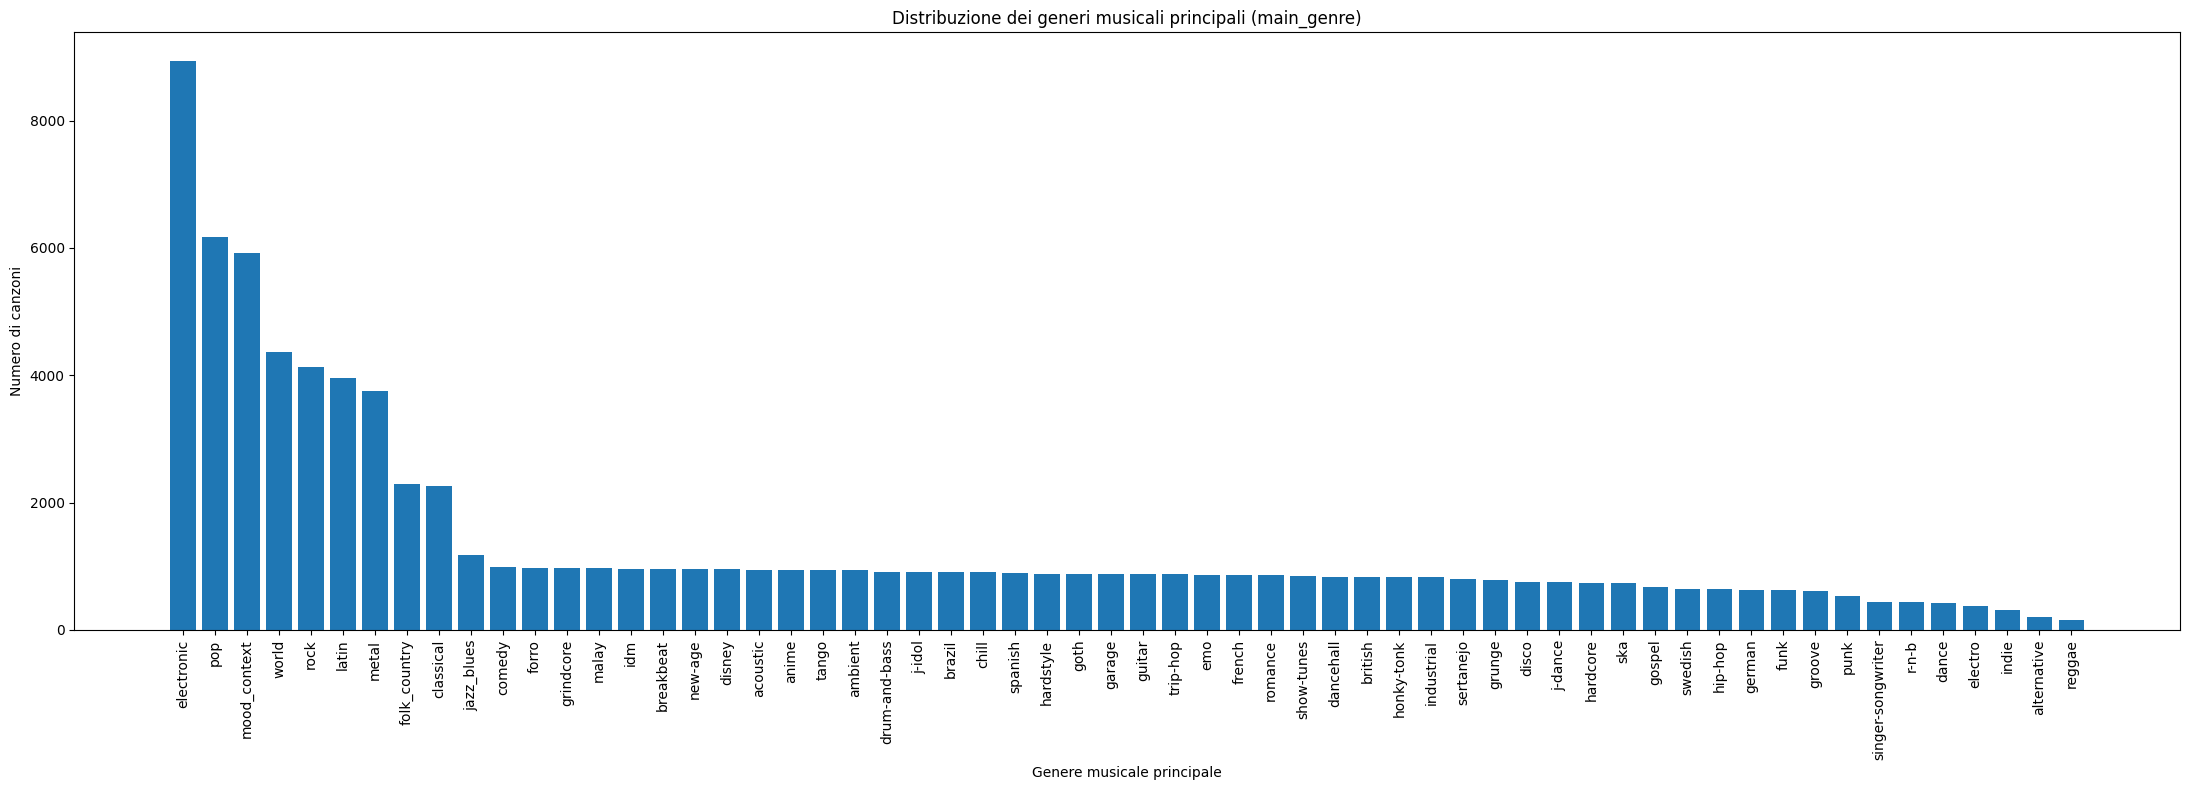

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8))

plt.bar(
    genre_df["main_genre"],
    genre_df["num_tracks"]
)

plt.xlabel("Genere musicale principale")
plt.ylabel("Numero di canzoni")
plt.title("Distribuzione dei generi musicali principali (main_genre)")

# Ruoto le etichette per leggibilità
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
